INTRODUCTION


Bitcoin, the pioneering cryptocurrency, has captured the attention of investors, technologists, and financial institutions alike since its inception in 2009. As a decentralized digital currency, Bitcoin operates on a peer-to-peer network, enabling secure and transparent transactions without the need for intermediaries. Over the years, Bitcoin has experienced remarkable volatility and meteoric price increases, making it an intriguing subject for data analysis. In this Jupyter Notebook project, we delve into the historical data of Bitcoin to uncover patterns, trends, and insights that can shed light on its price movements. By examining factors such as market trends, trading volumes, and historical events, we aim to gain a deeper understanding of Bitcoin's past performance and potentially valuable insights for future market predictions. Through data exploration, visualization, and statistical analysis, we embark on an exciting journey to unlock the secrets hidden within Bitcoin's historical data, allowing us to explore the fascinating world of cryptocurrency and its impact on the financial landscape.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In the next code snippet we import the file to be analyzed


In [2]:
btc = pd.read_csv("Bitcoin Historical Data - Investing.com India.csv")

In the next code snippets we get an overview of the data content, these will include:
1. Print first 5 rows
2. Print last 5 rows
3. Number of columns and rows in the data
4. Column names and rows indexes
5. Statistical properties of the data


In [3]:
btc.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,Jun 23,"26,931.0","27,216.4","27,410.2","24,838.0",1.06M,-1.05%
1,May 23,"27,216.1","29,252.1","29,816.4","25,853.1",1.66M,-6.96%
2,Apr 23,"29,252.1","28,473.7","30,964.9","27,054.3",2.03M,2.73%
3,Mar 23,"28,473.7","23,130.6","29,160.4","19,591.8",10.26M,23.10%
4,Feb 23,"23,130.5","23,124.7","25,236.8","21,418.7",9.09M,0.02%


In [4]:
btc.tail()

,Date,Price,Open,High,Low,Vol.,Change %
150,Dec 10,0.3,0.2,0.3,0.2,263.65K,44.09%
151,Nov 10,0.2,0.2,0.5,0.1,826.25K,0.00%
152,Oct 10,0.2,0.1,0.2,0.0,1.11M,210.99%
153,Sep 10,0.1,0.1,0.2,0.1,216.81K,0.00%
154,Aug 10,0.1,0.1,0.1,0.0,221.74K,0.00%


In [5]:
btc.shape


(155, 7)

In [6]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      155 non-null    object
 1   Price     155 non-null    object
 2   Open      155 non-null    object
 3   High      155 non-null    object
 4   Low       155 non-null    object
 5   Vol.      155 non-null    object
 6   Change %  155 non-null    object
dtypes: object(7)
memory usage: 8.6+ KB


In [7]:
btc.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,155,155,155,155,155,155,155
unique,155,150,149,154,149,144,148
top,Jun 23,4.9,0.1,0.2,0.0,1.66M,0.00%
freq,1,3,3,2,2,4,5


In the next code snippet we check for null values in the data

In [8]:
btc.isnull().sum()



Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

From the output above, we have no null values. In the snippet bellow, we have to parse the date column as date and not as objecttype. This will help us manipulate the data more easily. Our date data has the month and year, therefore we should adjust the format accordingly. In our case, the format appears to be "%b %y", where "%b" represents the abbreviated month name and "%y" represents the two-digit year.

In [10]:
btc['Date'] = pd.to_datetime(btc['Date'], format="%b %y")



In the next code snippet we set the date column as our index column.Setting the 'Date' column as the index can make it easier to perform time-based analysis, such as selecting specific date ranges, resampling data based on different time frequencies, and plotting time series data more intuitively.

In [11]:
btc.set_index('Date', inplace=True)


In the next section we clean the data further by formatting the values by changing them to numeric values and removing the commas. The to_numeric() fuction automatically removes the comma seperators for thousands.

In [24]:
# Convert 'Price' column to string type
btc['Price'] = pd.to_numeric(btc['Price'])
btc['Open'] = pd.to_numeric(btc['Open'])
btc['High'] = pd.to_numeric(btc['High'])
btc['Low'] = pd.to_numeric(btc['Low'])

btc.head()





,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-06-01,26931.0,27216.4,27410.2,24838.0,1.06M,-1.05%
2023-05-01,27216.1,29252.1,29816.4,25853.1,1.66M,-6.96%
2023-04-01,29252.1,28473.7,30964.9,27054.3,2.03M,2.73%
2023-03-01,28473.7,23130.6,29160.4,19591.8,10.26M,23.10%
2023-02-01,23130.5,23124.7,25236.8,21418.7,9.09M,0.02%


In the next section we format the Vol. column to converts the K, M and B to thousands millions and billion respectivey. After that we format the vol. column as numeric values. For the fors section we use the else if function

In [27]:
def convert_volume(volume):
    if isinstance(volume, float):
        return volume
    elif 'K' in volume:
        return float(volume.replace('K', '')) * 1000
    elif 'M' in volume:
        return float(volume.replace('M', '')) * 1000000
    elif 'B' in volume:
        return float(volume.replace('B', '')) * 1000000000
    else:
        return float(volume)


btc['Vol.'] = btc['Vol.'].apply(convert_volume)
btc['Vol.'] = pd.to_numeric(btc['Vol.'])
print(btc.head(10))
 

              Price     Open     High      Low        Vol. Change %
Date                                                               
2023-06-01  26931.0  27216.4  27410.2  24838.0   1060000.0   -1.05%
2023-05-01  27216.1  29252.1  29816.4  25853.1   1660000.0   -6.96%
2023-04-01  29252.1  28473.7  30964.9  27054.3   2030000.0    2.73%
2023-03-01  28473.7  23130.6  29160.4  19591.8  10260000.0   23.10%
2023-02-01  23130.5  23124.7  25236.8  21418.7   9090000.0    0.02%
2023-01-01  23125.1  16537.5  23952.9  16499.7   8980000.0   39.83%
2022-12-01  16537.4  17163.4  18351.8  16331.2   6610000.0   -3.65%
2022-11-01  17163.9  20496.1  21464.7  15504.2  10300000.0  -16.26%
2022-10-01  20496.3  19422.9  21038.1  18207.9   8290000.0    5.53%
2022-09-01  19423.0  20049.9  22702.5  18191.8  10910000.0   -3.10%


VISUALIZATION

First we start by plotting the bitcoin High historical data

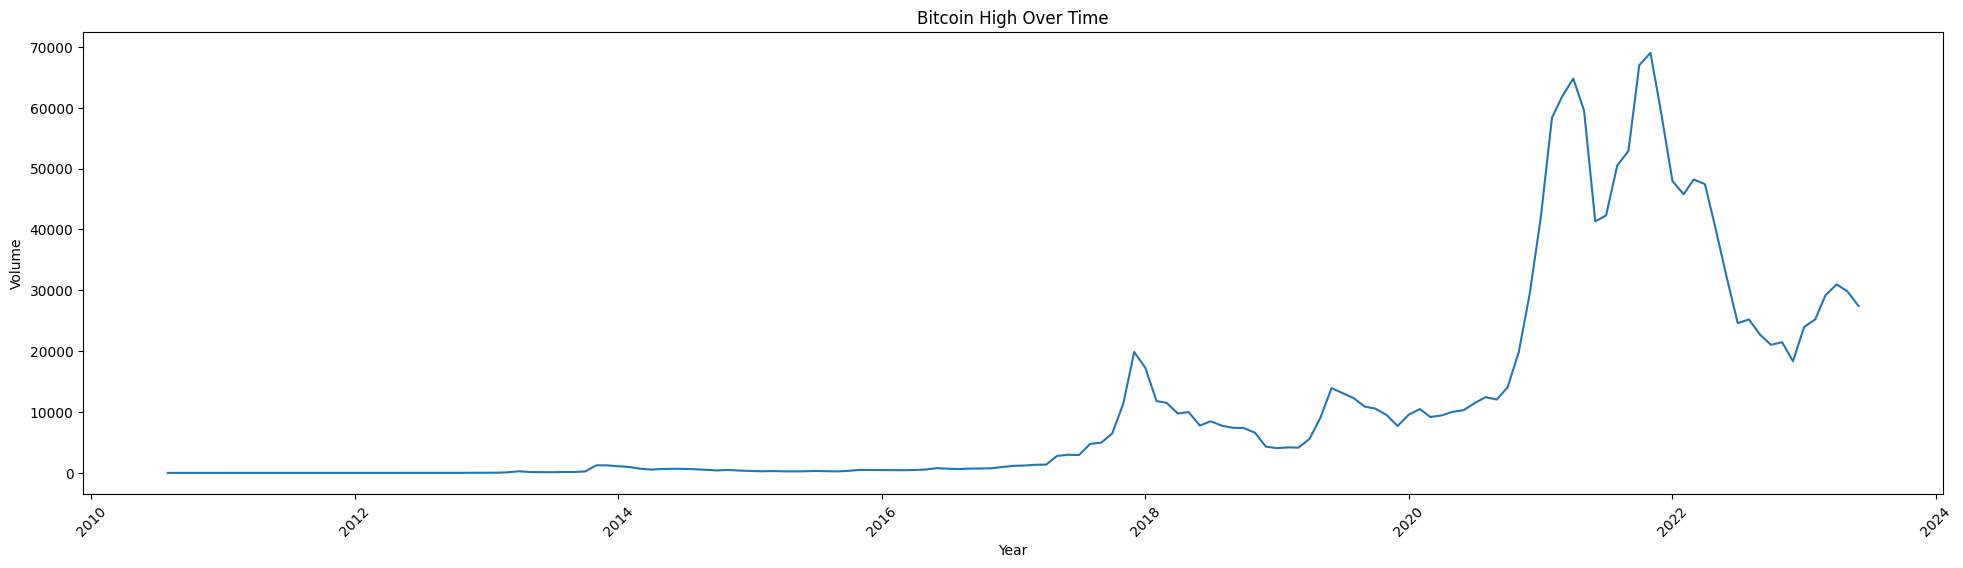

In [36]:
plt.figure(figsize=(24, 6))
plt.plot(btc.index, btc['High'])
plt.title('Bitcoin High Over Time')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()


From the above graph we can tell that the first Bitcoin high monemt was recorded in late 2013 after having been 0 or almost 0 for over 3 years. The High takes off in mid 2017 and continues to rise till 2018 where there's a DIP. The all time high ecorded according to our Visual was in the late 2021 with bitcoin reaching an all time high of around $68000

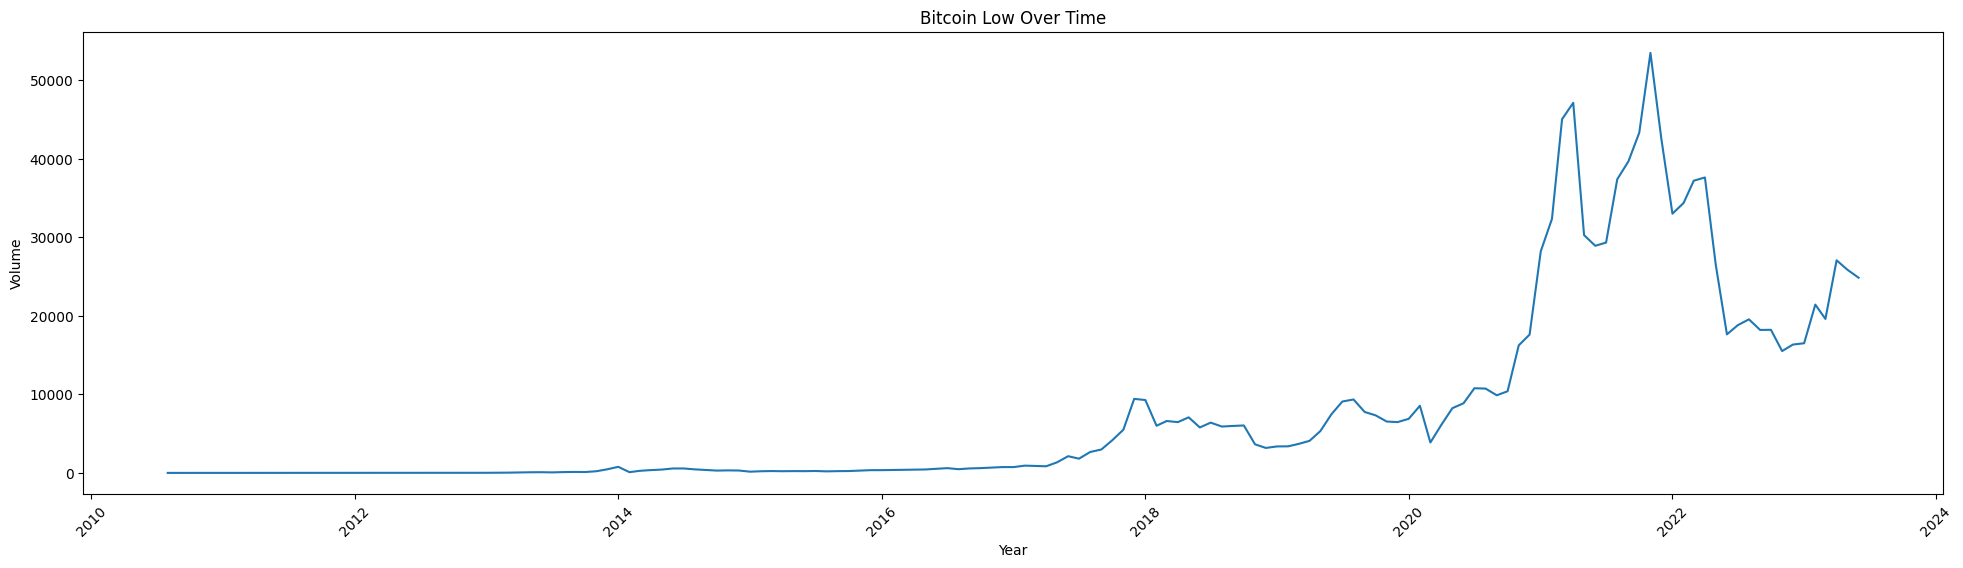

In [32]:
plt.figure(figsize=(24, 6))
plt.plot(btc.index, btc['Low'])
plt.title('Bitcoin Low Over Time')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

From the data above we can tell thst Bitcoin had its worst performance between the years 2010 and 2017. Bitcoin has had the best performance between the years 2020 to date. The highest all time low recorded was at around late 2021 nad early 2022.

Here is a graph showing both the LOw and High plots.

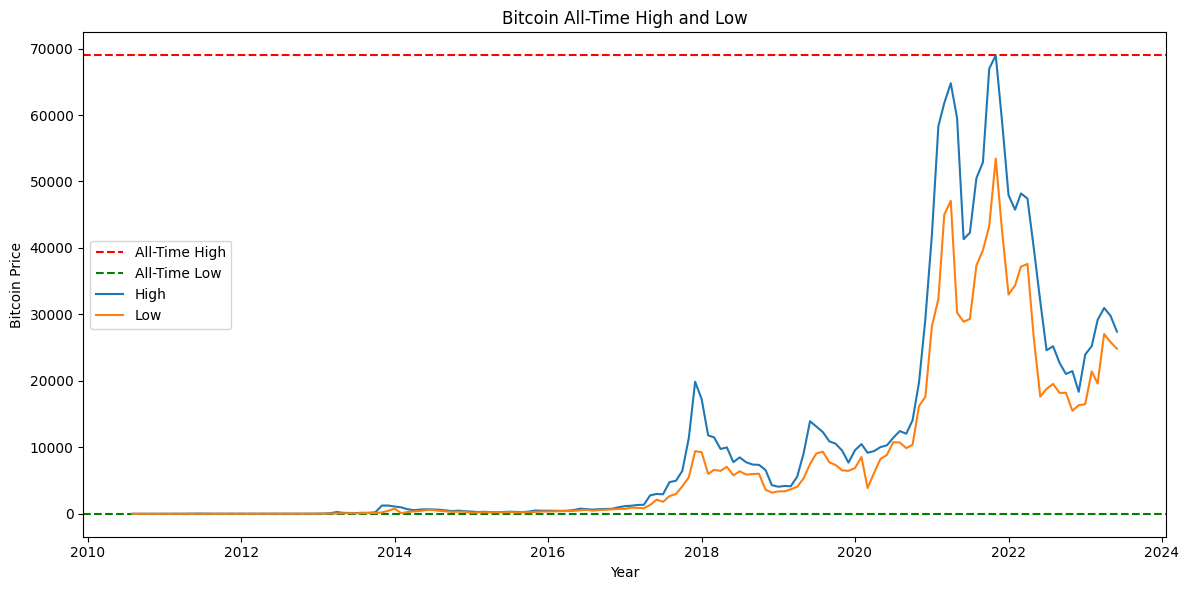

In [34]:
all_time_high = btc['High'].max()
all_time_low = btc['Low'].min()

plt.figure(figsize=(12, 6))
plt.axhline(all_time_high, color='r', linestyle='--', label='All-Time High')
plt.axhline(all_time_low, color='g', linestyle='--', label='All-Time Low')
plt.plot(btc.index, btc['High'], label='High')
plt.plot(btc.index, btc['Low'], label='Low')
plt.xlabel('Year')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin All-Time High and Low')


plt.legend()
plt.tight_layout()
plt.show()

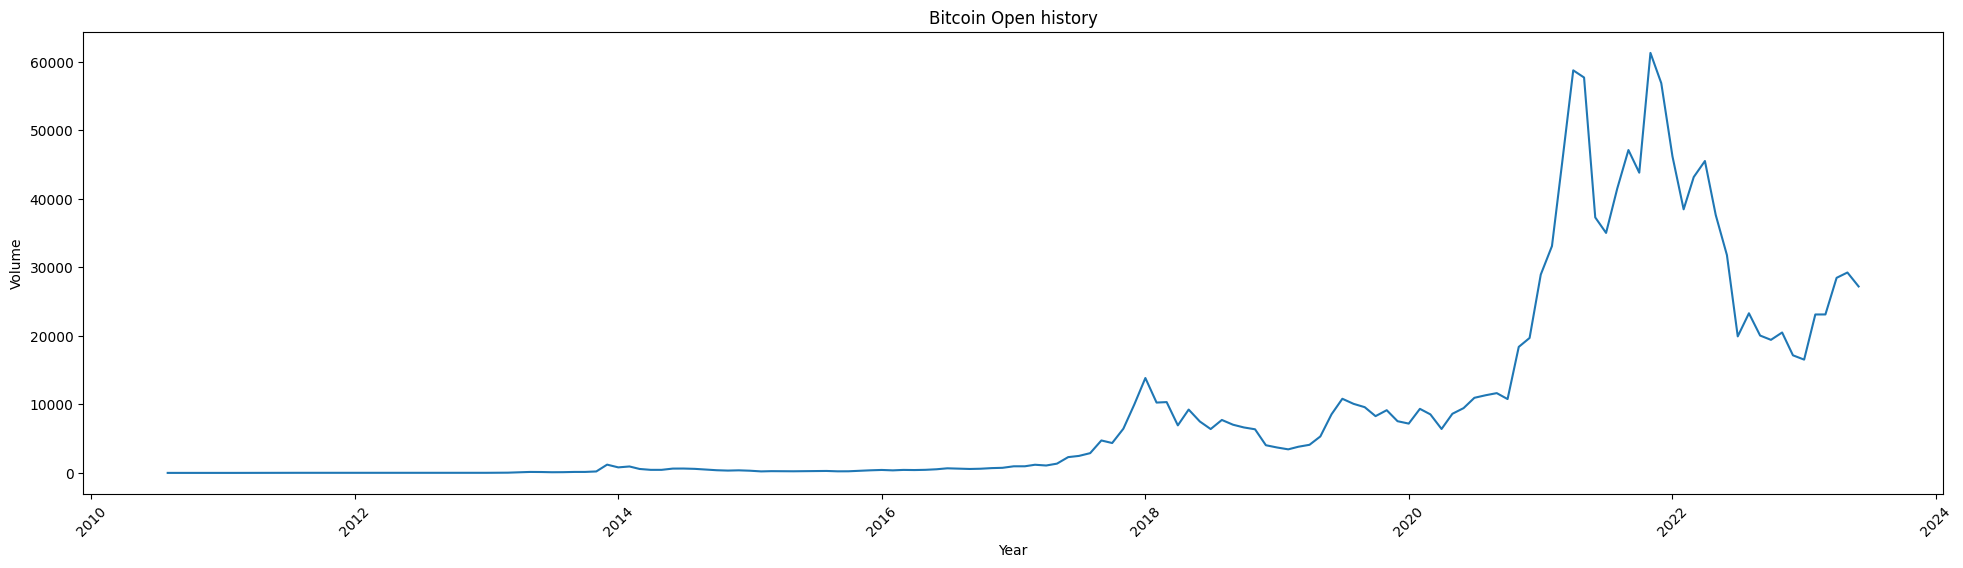

In [37]:
plt.figure(figsize=(24, 6))
plt.plot(btc.index, btc['Open'])
plt.title('Bitcoin Open history')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

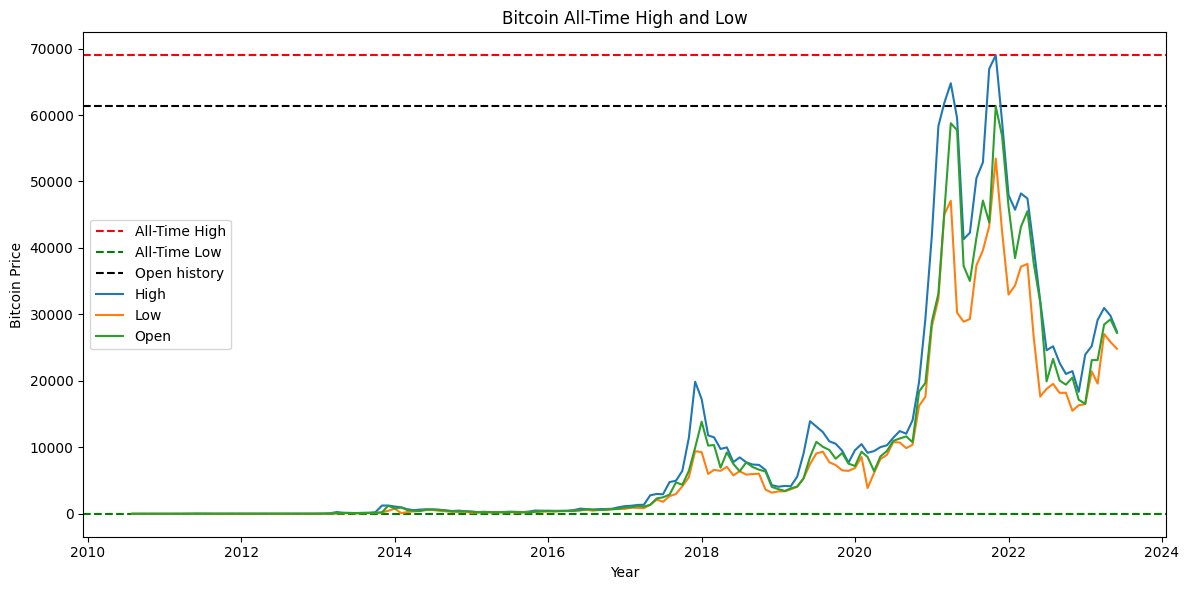

In [41]:
all_time_high = btc['High'].max()
all_time_low = btc['Low'].min()
Open_history =btc['Open'].max()

plt.figure(figsize=(12, 6))
plt.axhline(all_time_high, color='r', linestyle='--', label='All-Time High')
plt.axhline(all_time_low, color='g', linestyle='--', label='All-Time Low')
plt.axhline(Open_history, color='black', linestyle='--', label='Open history')
plt.plot(btc.index, btc['High'], label='High')
plt.plot(btc.index, btc['Low'], label='Low')
plt.plot(btc.index, btc['Open'], label='Open')
plt.xlabel('Year')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin All-Time High, Low and open history')


plt.legend()
plt.tight_layout()
plt.show()


Let us now concentrate on the years 2017 - 2024 where bitcoin has had match activity to draw our insights from the activities

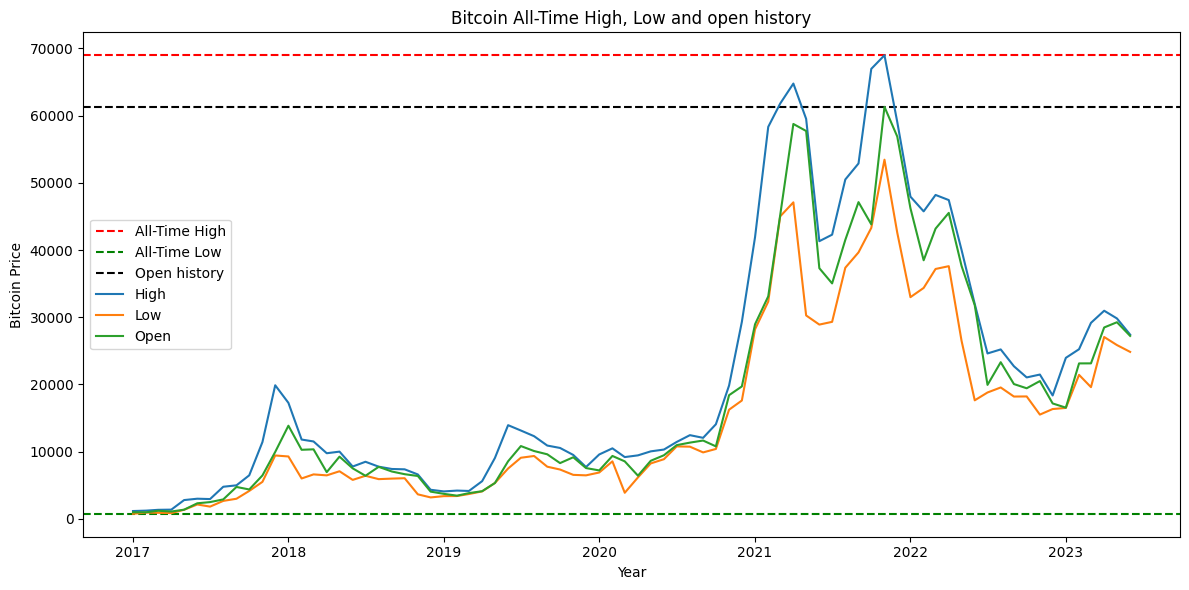

In [48]:
btc_filtered = btc[(btc.index.year >= 2017) & (btc.index.year <= 2024)]

all_time_high = btc_filtered['High'].max()
all_time_low = btc_filtered['Low'].min()
Open_history =btc_filtered['Open'].max()

plt.figure(figsize=(12, 6))
plt.axhline(all_time_high, color='r', linestyle='--', label='All-Time High')
plt.axhline(all_time_low, color='g', linestyle='--', label='All-Time Low')
plt.axhline(Open_history, color='black', linestyle='--', label='Open history')
plt.plot(btc_filtered.index, btc_filtered['High'], label='High')
plt.plot(btc_filtered.index, btc_filtered['Low'], label='Low')
plt.plot(btc_filtered.index, btc_filtered['Open'], label='Open')
plt.xlabel('Year')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin All-Time High, Low and open history')


plt.legend()
plt.tight_layout()
plt.show()